# Aperiodic Methods: Compare Spectral Fitting

In [1]:
%matplotlib inline

import seaborn as sns

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.fake import SynFits, print_res
from apm.core.db import APMDB
from apm.core.io import load_pickle
from apm.plts.fake import *
from apm.plts.fake import _color_red_or_green

In [3]:
# Housekeeping
db = APMDB()

In [4]:
# Check available synthetic fit files
syn_files = db.check_files('syns')

In [5]:
# Collect all fits together
all_fits = SynFits()
all_fits.get_fit_funcs()
all_fits.get_err_dict(0)

for f_name in syn_files:

    dat = load_pickle(f_name, db.syns_path)

    temp = SynFits()
    temp.errs = dat
    
    all_fits = all_fits + temp

In [6]:
# Check how many PSDs are included in synthetic fits
print(len(all_fits.errs['EXP']))

3650


In [7]:
# Check the average errors per method
print_res(all_fits.calc_avg_errs(avg='median'))

   RLM-EO   		 0.03340
   RAN-EO   		 0.04171
   EXP-EO   		 0.04171
   FOOOF    		 0.05313
   RAN-EA   		 0.06674
   RLM-EA   		 0.06757
   RAN      		 0.08896
   RLM      		 0.08933
   EXP-EA   		 0.11189
   EXP      		 0.15734
   OLS      		 0.15734


In [8]:
# Check the number of fits that pass a threshold, per method
print_res(all_fits.calc_perc_good(thresh=0.025))

   RLM-EO   		 0.43342
   EXP-EO   		 0.39479
   RAN-EO   		 0.38192
   FOOOF    		 0.37616
   RLM-EA   		 0.32219
   RAN-EA   		 0.31479
   RLM      		 0.27863
   RAN      		 0.25808
   EXP-EA   		 0.19397
   OLS      		 0.11753
   EXP      		 0.11753


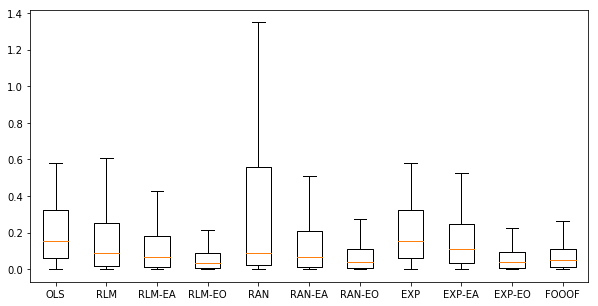

In [9]:
# Create boxplot of errors
boxplot_errors(all_fits.errs)

(0, 2.5)

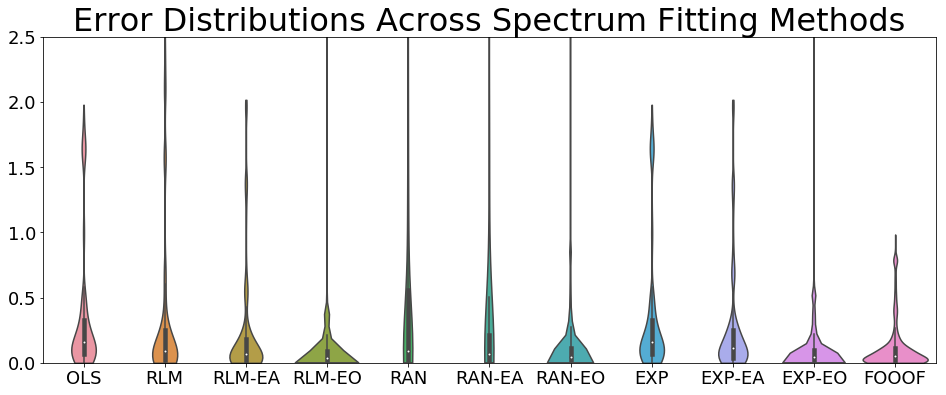

In [10]:
# Violin plot of error distributions
ax = violin_errors(all_fits.errs);
plt.ylim([0, 2.5])

# Save out figure
#plt.savefig('violin_plot.png', format='png', bbox_inches='tight', dpi=300)

## Statistically Compare Methods

In [11]:
# Run comparisons between methods
comps = all_fits.comp_errs()

In [12]:
# Print out color-coded dataframe of comparison results
df = pd.DataFrame(comps, index=all_fits.errs.keys(), columns=all_fits.errs.keys())
df.style.applymap(_color_red_or_green)

,OLS,RLM,RLM-EA,RLM-EO,RAN,RAN-EA,RAN-EO,EXP,EXP-EA,EXP-EO,FOOOF
OLS,1,1.23429e-49,1.10963e-109,0,6.35377e-14,9.41796e-87,1.71317e-271,0.909322,1.42408e-23,0,1.42913e-228
RLM,1.23429e-49,1,1.70246e-14,3.02872e-122,3.89012e-11,6.51886e-06,8.07132e-73,1.23705e-49,8.4977e-09,3.37912e-94,2.92443e-50
RLM-EA,1.10963e-109,1.70246e-14,1,7.29447e-57,2.53545e-42,0.000851983,1.59451e-22,1.10963e-109,1.76232e-42,6.4624e-35,7.87092e-12
RLM-EO,0,3.02872e-122,7.29447e-57,1,7.78595e-183,1.10581e-79,2.88473e-11,0,1.66353e-216,1.03206e-05,1.06929e-25
RAN,6.35377e-14,3.89012e-11,2.53545e-42,7.78595e-183,1,1.15168e-26,1.94185e-127,6.36913e-14,0.475463,4.14996e-153,4.1437e-98
RAN-EA,9.41796e-87,6.51886e-06,0.000851983,1.10581e-79,1.15168e-26,1,2.50061e-41,9.41796e-87,1.357e-26,2.34412e-56,9.00115e-21
RAN-EO,1.71317e-271,8.07132e-73,1.59451e-22,2.88473e-11,1.94185e-127,2.50061e-41,1,1.71317e-271,1.83504e-144,0.0166238,9.91852e-06
EXP,0.909322,1.23705e-49,1.10963e-109,0,6.36913e-14,9.41796e-87,1.71317e-271,1,1.42408e-23,0,1.42913e-228
EXP-EA,1.42408e-23,8.4977e-09,1.76232e-42,1.66353e-216,0.475463,1.357e-26,1.83504e-144,1.42408e-23,1,7.66558e-180,2.71942e-115
EXP-EO,0,3.37912e-94,6.4624e-35,1.03206e-05,4.14996e-153,2.34412e-56,0.0166238,0,7.66558e-180,1,1.24788e-12
